### Record for old workflows
out-dated plots 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot

from coffea import hist
import re

In [46]:
output = load("hists_ctag_jec_ctag_AK4_Rereco.coffea")
output2 = load("hists_ctag_jec_ctag_AK4_ULJEC.coffea")

data_err_opts = {
    "linestyle": "none",
    "marker": ".",
    "markersize": 10.0,
    "color": "k",
    "elinewidth": 1,
}
data2_err_opts = {
    "linestyle": "none",
    "marker": ".",
    "markersize": 10.0,
    "color": "tab:blue",
    "elinewidth": 1,
}
data3_err_opts = {
    "linestyle": "none",
    "marker": ".",
    "markersize": 10.0,
    "color": "tab:orange",
    "elinewidth": 1,
}
from BTVNanoCommissioning.helpers.xs_scaler import scale_xs

<Hist (dataset,flav,deepcsv_CvB) instance at 0x7f33dc496f50>


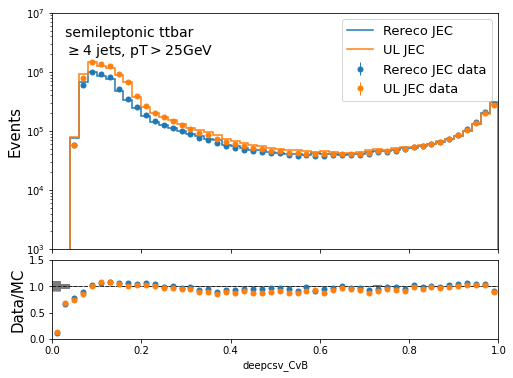

In [48]:
events = output["sumw"]
lists = ["deepcsv_CvB"]
for var in lists:
    hf = output[var]
    hf2 = output2[var]
    lumi = 4319
    hf = scale_xs(hf, lumi, events)
    hf2 = scale_xs(hf2, lumi, events)
    print(hf)
    notdatas = re.compile("(?!Data)")
    notdata = re.compile("(?!data_runD)")
    fig, ((ax), (rax)) = plt.subplots(
        2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
    )
    fig.subplots_adjust(hspace=0.07)

    ax = plot.plot1d(
        hf[notdatas].sum("dataset").sum("flav"),
        line_opts={"color": "tab:blue"},
        ax=ax,
        density=False,
        clear=False,
    )
    plot.plot1d(
        hf["Data"].sum("dataset").sum("flav"),
        ax=ax,
        density=False,
        error_opts=data2_err_opts,
        clear=False,
    )
    plot.plot1d(
        hf2[notdatas].sum("dataset").sum("flav"), ax=ax, density=False, clear=False
    )
    plot.plot1d(
        hf2["Data"].sum("dataset").sum("flav"),
        ax=ax,
        density=False,
        error_opts=data3_err_opts,
        clear=False,
    )

    # ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','pileup','l','data'],fontsize=13)
    ax.legend(
        handles=ax.get_legend_handles_labels()[0],
        labels=["Rereco JEC", "UL JEC", "Rereco JEC data", "UL JEC data"],
        fontsize=13,
    )

    ax.set_xlabel(None)

    rax = plot.plotratio(
        num=hf["Data"].sum("dataset").sum("flav"),
        denom=hf[notdatas].sum("dataset").sum("flav"),
        ax=rax,
        error_opts=data2_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc="num",
        clear=False,
    )
    plot.plotratio(
        num=hf2["Data"].sum("dataset").sum("flav"),
        denom=hf2[notdatas].sum("dataset").sum("flav"),
        ax=rax,
        error_opts=data3_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc="num",
        clear=False,
    )

    ax.set_ylim(1000, 10000000)
    ax.semilogy()
    at = AnchoredText(
        r"semileptonic ttbar" + "\n" + "$\geq$4 jets, pT$>$25GeV",
        loc=2,
        prop=dict(size=14),
        frameon=False,
    )
    ax.add_artist(at)
    ax.set_ylabel("Events", fontsize=15)
    rax.set_ylabel("Data/MC", fontsize=15)
    # rax.set_xlabel('sublead',fontsize=15)
    rax.set_ylim(0.0, 1.5)
    fig.savefig("plot/JEC_ctag_%s.png" % (var))
    fig.savefig("plot/JEC_ctag_%s.png" % (var))

/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:428: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:440: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:475: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:428: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:440: RuntimeWarning: invalid value encountered in true_divide
  poisson

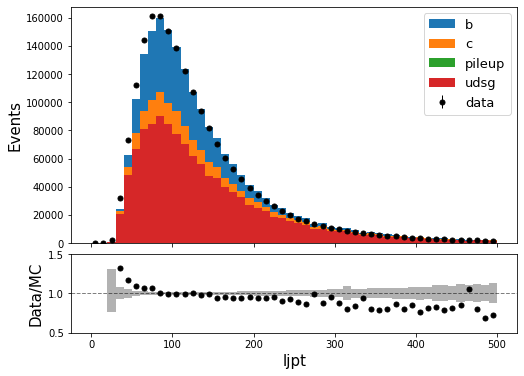

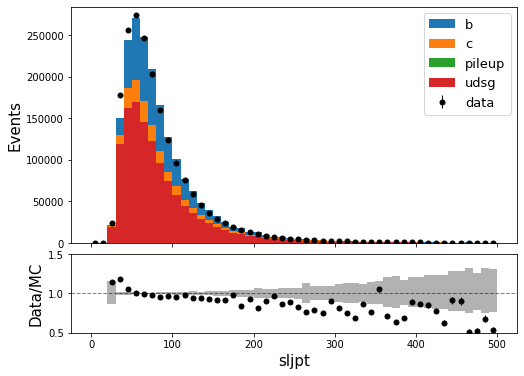

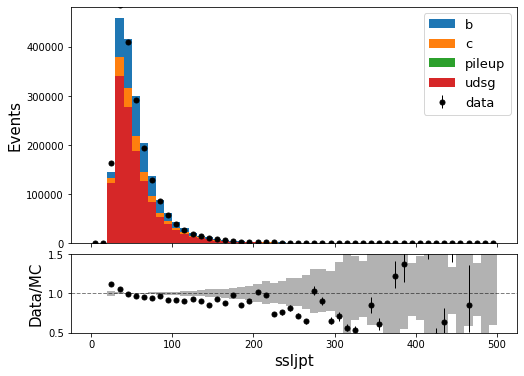

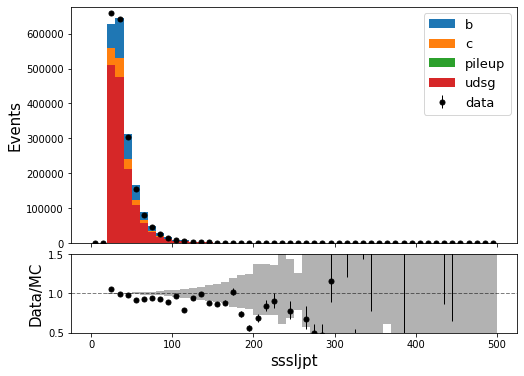

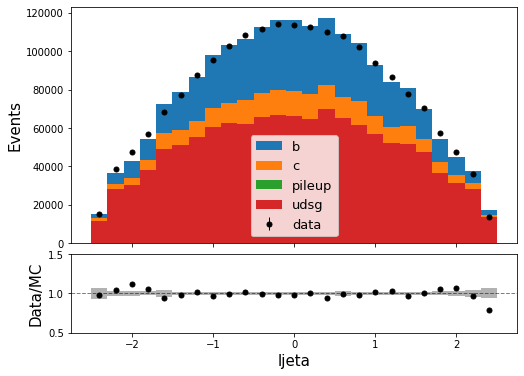

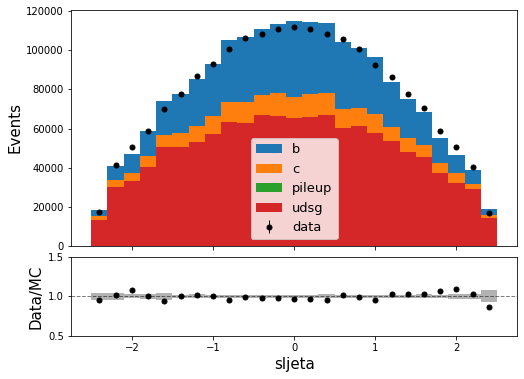

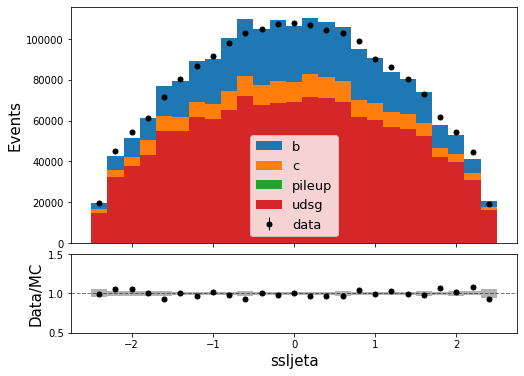

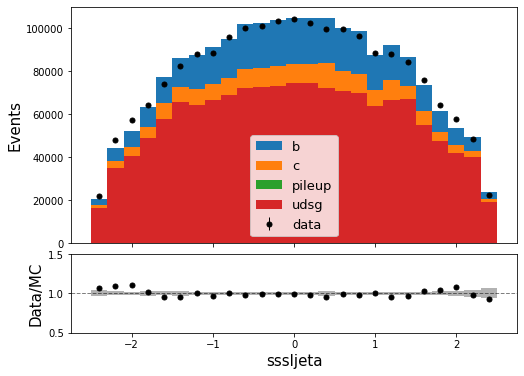

In [54]:
events = output["sumw"]
# ptetas=['ljpt','sljpt','ssljpt','sssljpt','ljeta','sljeta','ssljeta','sssljeta']
ptetas = ["ljpt", "sljpt", "ljeta", "sljeta"]
datas = re.compile("(?=data)")
for name in ptetas:
    hlj = output[name]
    hlj = scale_xs(hlj, 41500, events)
    fig, ((ax), (rax)) = plt.subplots(
        2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
    )
    fig.subplots_adjust(hspace=0.07)
    ax = plot.plot1d(
        hlj[notdata].sum("dataset"),
        overlay="flav",
        ax=ax,
        density=False,
        clear=False,
        stack=True,
    )
    plot.plot1d(
        hlj[datas].sum("dataset").sum("flav"),
        error_opts=data_err_opts,
        ax=ax,
        density=False,
        clear=False,
    )
    ax.legend(
        handles=ax.get_legend_handles_labels()[0],
        labels=["b", "c", "pileup", "udsg", "data"],
        fontsize=13,
    )

    rax = plot.plotratio(
        num=hlj[datas].sum("dataset").sum("flav"),
        denom=hlj[notdata].sum("dataset").sum("flav"),
        ax=rax,
        error_opts=data_err_opts,
        #                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
        denom_fill_opts={},
        guide_opts={},
        unc="num",
        clear=False,
    )

    ax.set_ylabel("Events", fontsize=15)
    rax.set_ylabel("Data/MC", fontsize=15)
    ax.set_xlabel(None)
    rax.set_xlabel(name, fontsize=15)
    rax.set_ylim(0.5, 1.5)
    fig.savefig("plot/%s_dilep.pdf" % (name))

## producing new plots
short cut for boost-hist setup, quickly check contents in output coffea file

plotting scripts are in plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import argparse
from matplotlib.offsetbox import AnchoredText
from BTVNanoCommissioning.helpers.xs_scaler import scale_xs
from coffea.util import load
import os, math, re, json, shutil, arrow

plt.style.use(hep.style.ROOT)

import hist as Hist

from BTVNanoCommissioning.helpers.xs_scaler import getSumW, collate, scaleSumW

In [2]:
from hist.intervals import ratio_uncertainty

output = load("hists_ttdilep_sf_test.coffea")
output = scaleSumW(output, 10, getSumW(output))  # MC scale to luminosity

## In case want to merge multiple samples into one hist
mergemap = {}
mergemap["data"] = [m for m in output.keys() if "Run" in m or "data" in m]
mergemap["mc"] = [m for m in output.keys() if "Run" not in m and "data" not in m]
collated = collate(output, mergemap)

data ['data_runD']
mc ['TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8', 'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8', 'TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8']


/nfs/dust/cms/user/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


<AxesSubplot:ylabel='Events'>

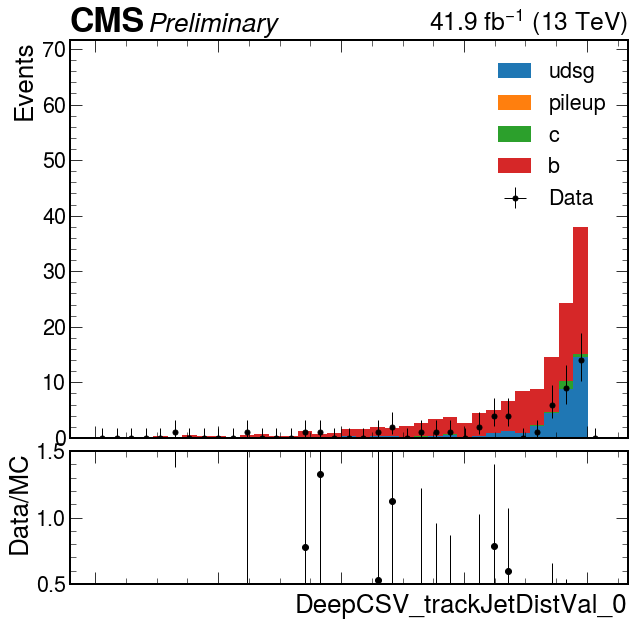

In [3]:
from hist.intervals import ratio_uncertainty

fig, ((ax), (rax)) = plt.subplots(
    2, 1, figsize=(10, 10), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
)
fig.subplots_adjust(hspace=0.05)
discr = "DeepCSV_trackJetDistVal_0"
hep.cms.label("Preliminary", data=True, lumi=41.9, loc=0, ax=ax)  # in fb
hep.histplot(
    [collated["mc"][discr][{"flav": i}] for i in range(4)],
    stack=True,
    histtype="fill",
    label=["udsg", "pileup", "c", "b"],
    yerr=True,
    ax=ax,
)
hep.histplot(
    collated["data"][discr][{"flav": sum}],
    histtype="errorbar",
    color="black",
    label="Data",
    yerr=True,
    ax=ax,
)
## ratio
rax.errorbar(
    x=collated["mc"][discr][{"flav": sum}].axes[0].centers,
    y=collated["data"][discr][{"flav": sum}].values()
    / collated["mc"][discr][{"flav": sum}].values(),
    yerr=ratio_uncertainty(
        collated["data"][discr][{"flav": sum}].values(),
        collated["mc"][discr][{"flav": sum}].values(),
    ),
    color="k",
    linestyle="none",
    marker="o",
    elinewidth=1,
)
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=0)
ax.set_ylabel("Events")
rax.set_ylabel("Data/MC")
rax.set_xlabel(discr)
ax.legend()
rax.set_ylim(0.5, 1.5)

at = AnchoredText(
    "",
    loc=2,
    frameon=False,
)
ax.add_artist(at)
hep.mpl_magic(ax=ax)